In [1]:
from fastai.vision.widgets import *
from fastai.vision.all import *
import random
import torch
torch.cuda.empty_cache()

In [2]:
path = Path('images_norsk')
fns = get_image_files(path)
fns

(#3298) [Path('images_norsk/toppmeis/oppmeis-f.jpg'),Path('images_norsk/toppmeis/wryer.jpeg'),Path('images_norsk/toppmeis/standard_compressed_toppmeis_117778.jpg'),Path('images_norsk/toppmeis/y9_Image_11.jpg'),Path('images_norsk/toppmeis/240x180.jpg'),Path('images_norsk/toppmeis/Töyhtötiainen_orrella.jpg'),Path('images_norsk/toppmeis/toppmeis_stor.jpg'),Path('images_norsk/toppmeis/w2_Image_26.jpg'),Path('images_norsk/toppmeis/L5_Image_16.jpg'),Path('images_norsk/toppmeis/16_cool_toppmeis1.jpg')...]

In [3]:
# Verify images
# failed = verify_images(fns)
# failed # No failed images, it seems

In [4]:
seed = random.randrange(100)
seed

54

In [5]:
birds_first = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.25, seed=seed),
    get_y=parent_label,
    item_tfms=Resize(128),
)

In [6]:
dls = birds_first.dataloaders(path)

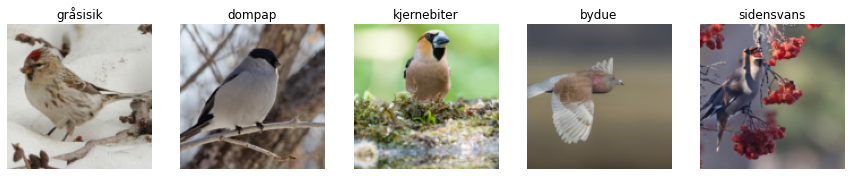

In [7]:
dls.valid.show_batch(max_n=5, nrows=1)

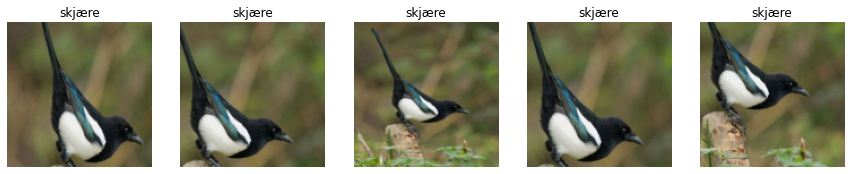

In [8]:
# Recommended transform: random resized crop (random on each epoch)
birds = birds_first.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

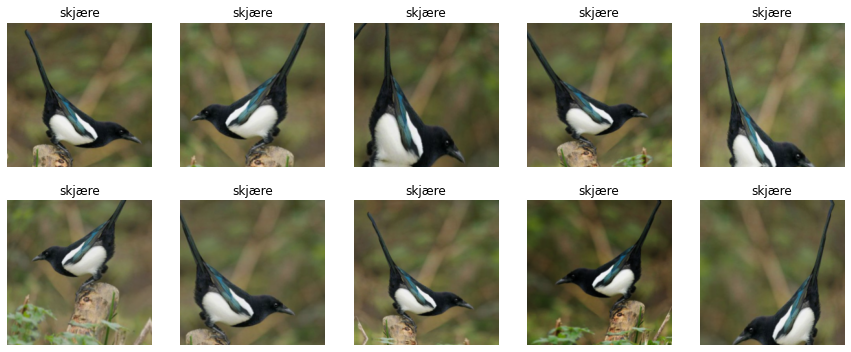

In [9]:
# Add data augmentation
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

## ResNet50

In [59]:
## Deeper arcitechture
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(7)

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 7.93 GiB total capacity; 6.87 GiB already allocated; 13.75 MiB free; 6.95 GiB reserved in total by PyTorch)

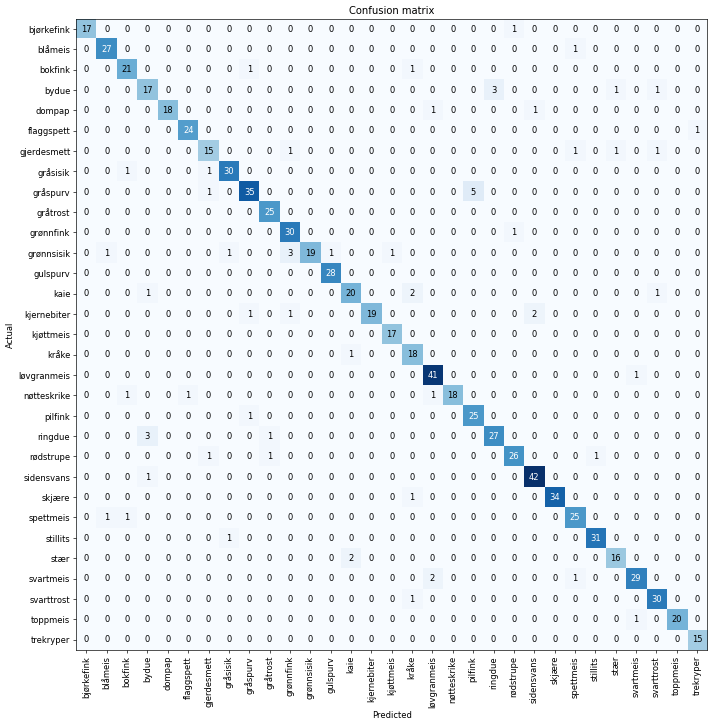

In [51]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [52]:
interp = ClassificationInterpretation.from_learner(learn)

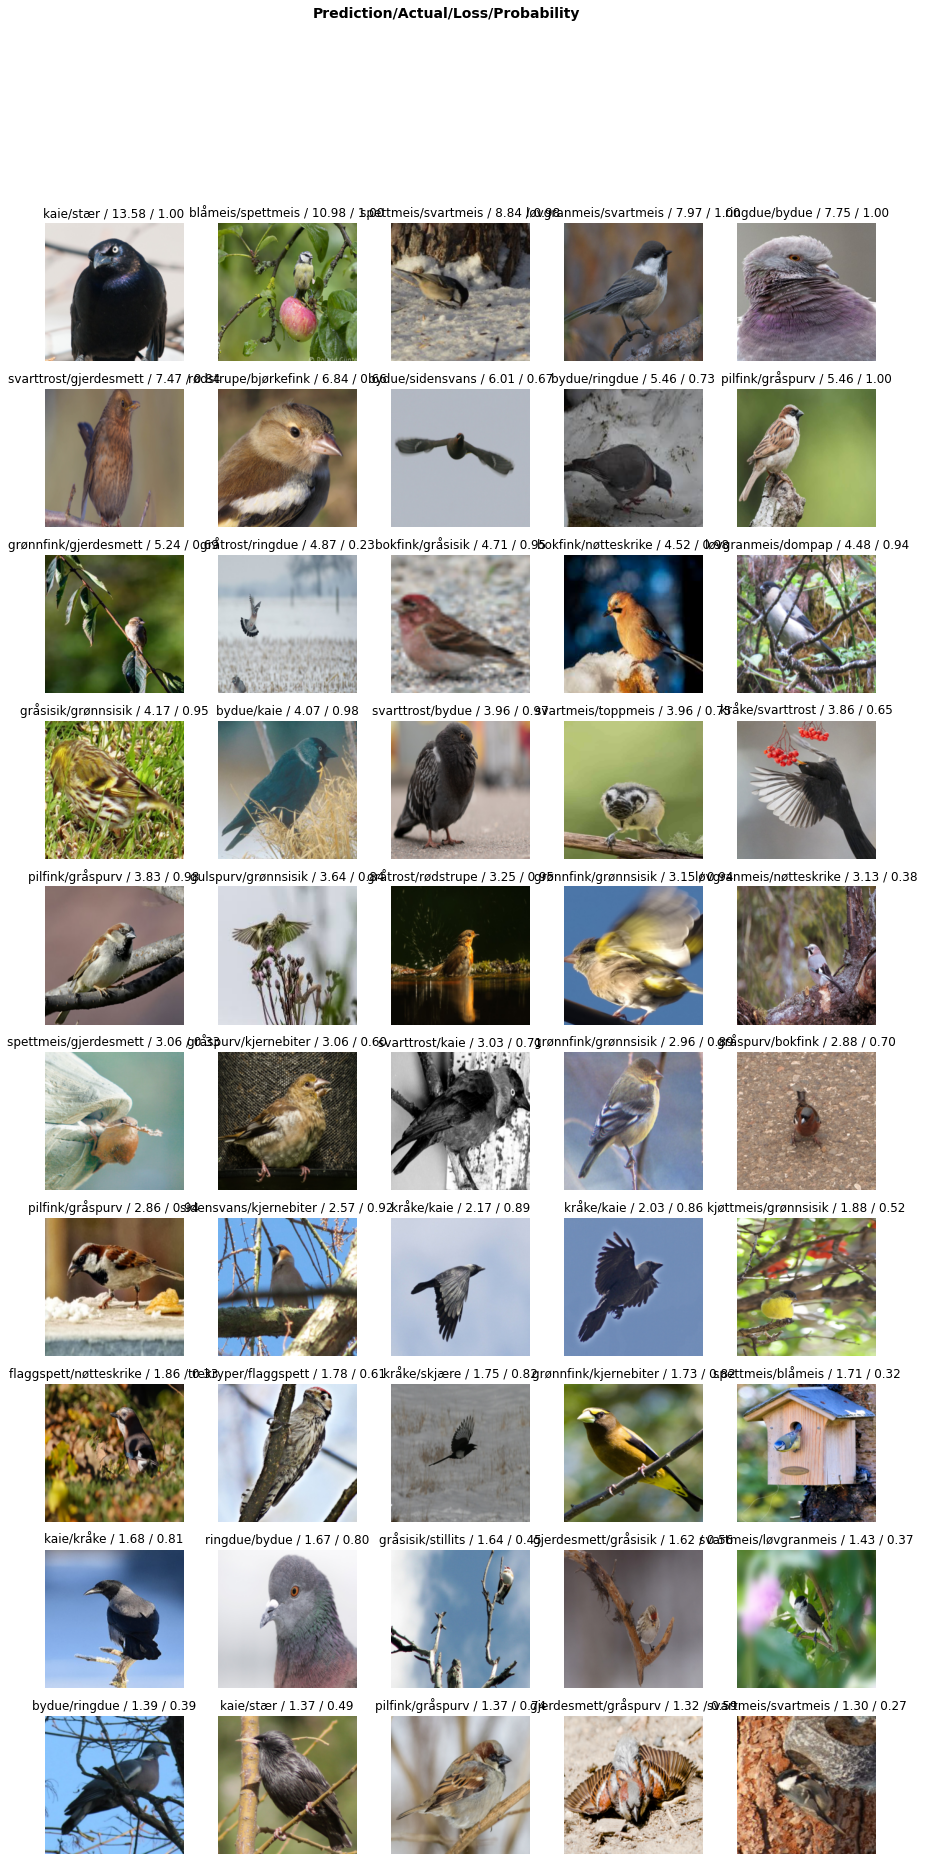

In [53]:
interp.plot_top_losses(50, nrows=10)

In [ ]:
#cleaner = ImageClassifierCleaner(learn)
# cleaner

## DenseNet121

In [54]:
# DenseNet is memory intensive, use a smaller batch size
dls = birds_first.dataloaders(path, bs=32)

In [55]:
## Deeper arcitechture
learn = cnn_learner(dls, densenet121, metrics=error_rate)
learn.fine_tune(7)

KeyboardInterrupt: 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(50, nrows=10)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

## DenseNet201

In [12]:
# DenseNet is memory intensive, use a smaller batch size
dls = birds_first.dataloaders(path, bs=24)

In [13]:
## Deeper arcitechture
learn = cnn_learner(dls, densenet201, metrics=error_rate)
learn.fine_tune(7)

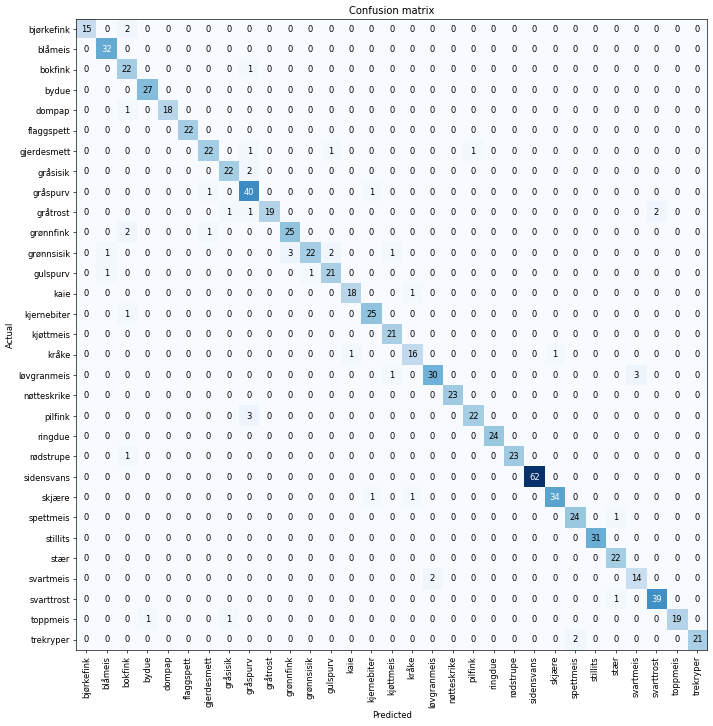

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

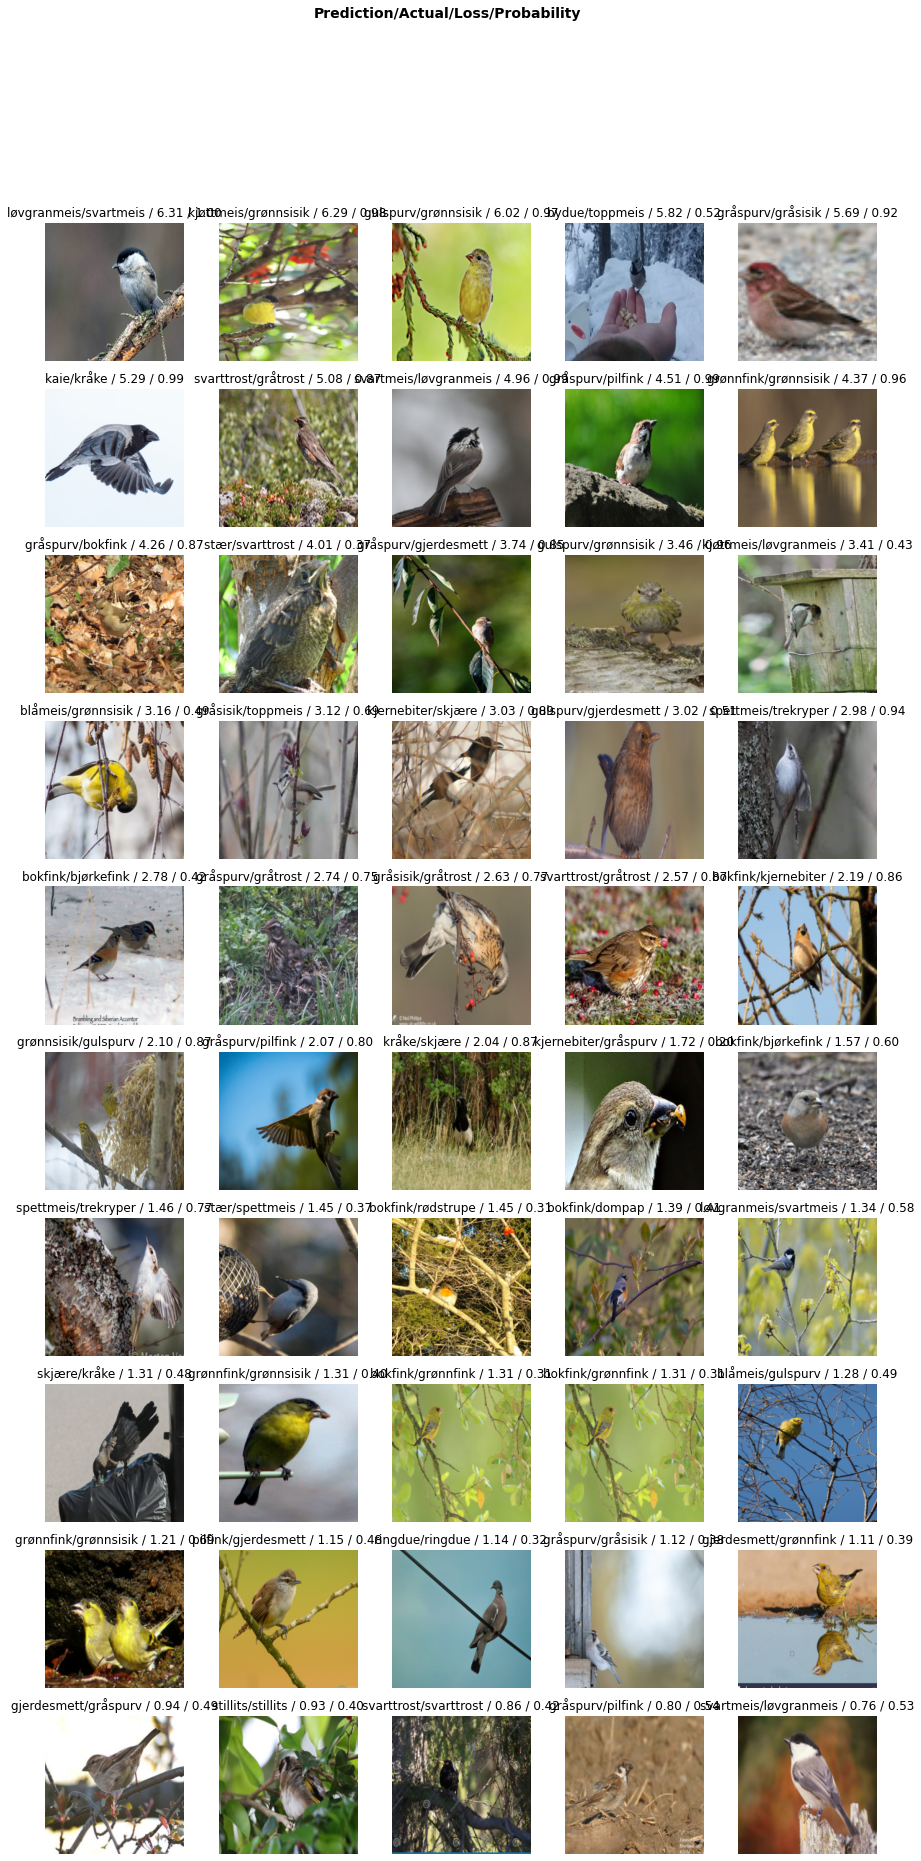

In [16]:
interp.plot_top_losses(50, nrows=10)

In [17]:
interp.plot_top_lossess??

Object `interp.plot_top_lossess` not found.


## DenseNet161

In [10]:
# DenseNet is memory intensive, use a smaller batch size
dls = birds_first.dataloaders(path, bs=24)

In [11]:
## decrease learning rate and create checkpoints (to restore model weights "optimal" weights)
learn = cnn_learner(dls, densenet161, metrics=error_rate)
lr = 1e-3
cbs=[SaveModelCallback()]
learn.fine_tune(20, lr, cbs=cbs)

Better model found at epoch 0 with valid_loss value: 0.5072455406188965.


Better model found at epoch 0 with valid_loss value: 0.3543214499950409.
Better model found at epoch 1 with valid_loss value: 0.3149690330028534.
Better model found at epoch 2 with valid_loss value: 0.26130178570747375.
Better model found at epoch 13 with valid_loss value: 0.25344473123550415.
Better model found at epoch 14 with valid_loss value: 0.2501349151134491.
Better model found at epoch 15 with valid_loss value: 0.2334621697664261.
Better model found at epoch 17 with valid_loss value: 0.22630178928375244.


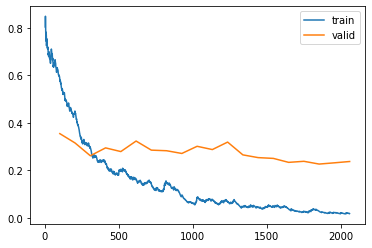

In [12]:
learn.recorder.plot_loss()

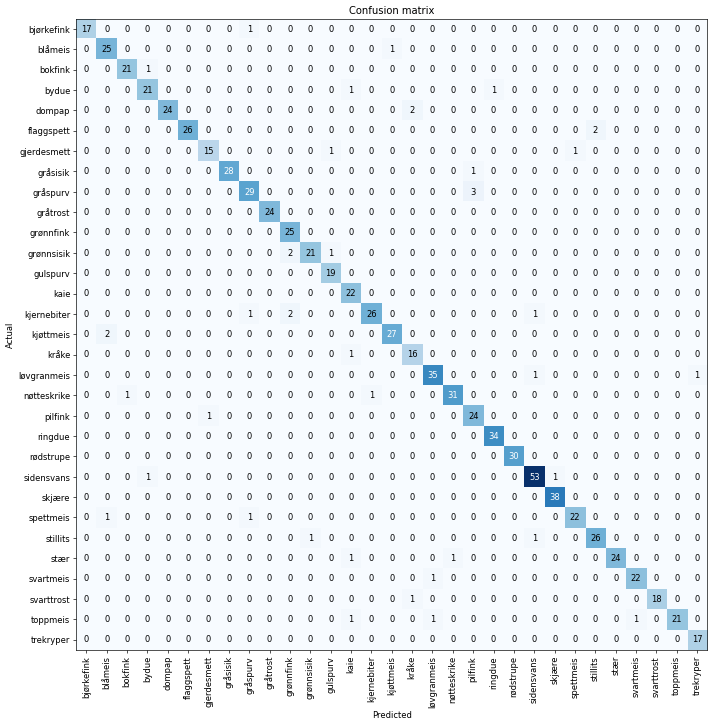

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

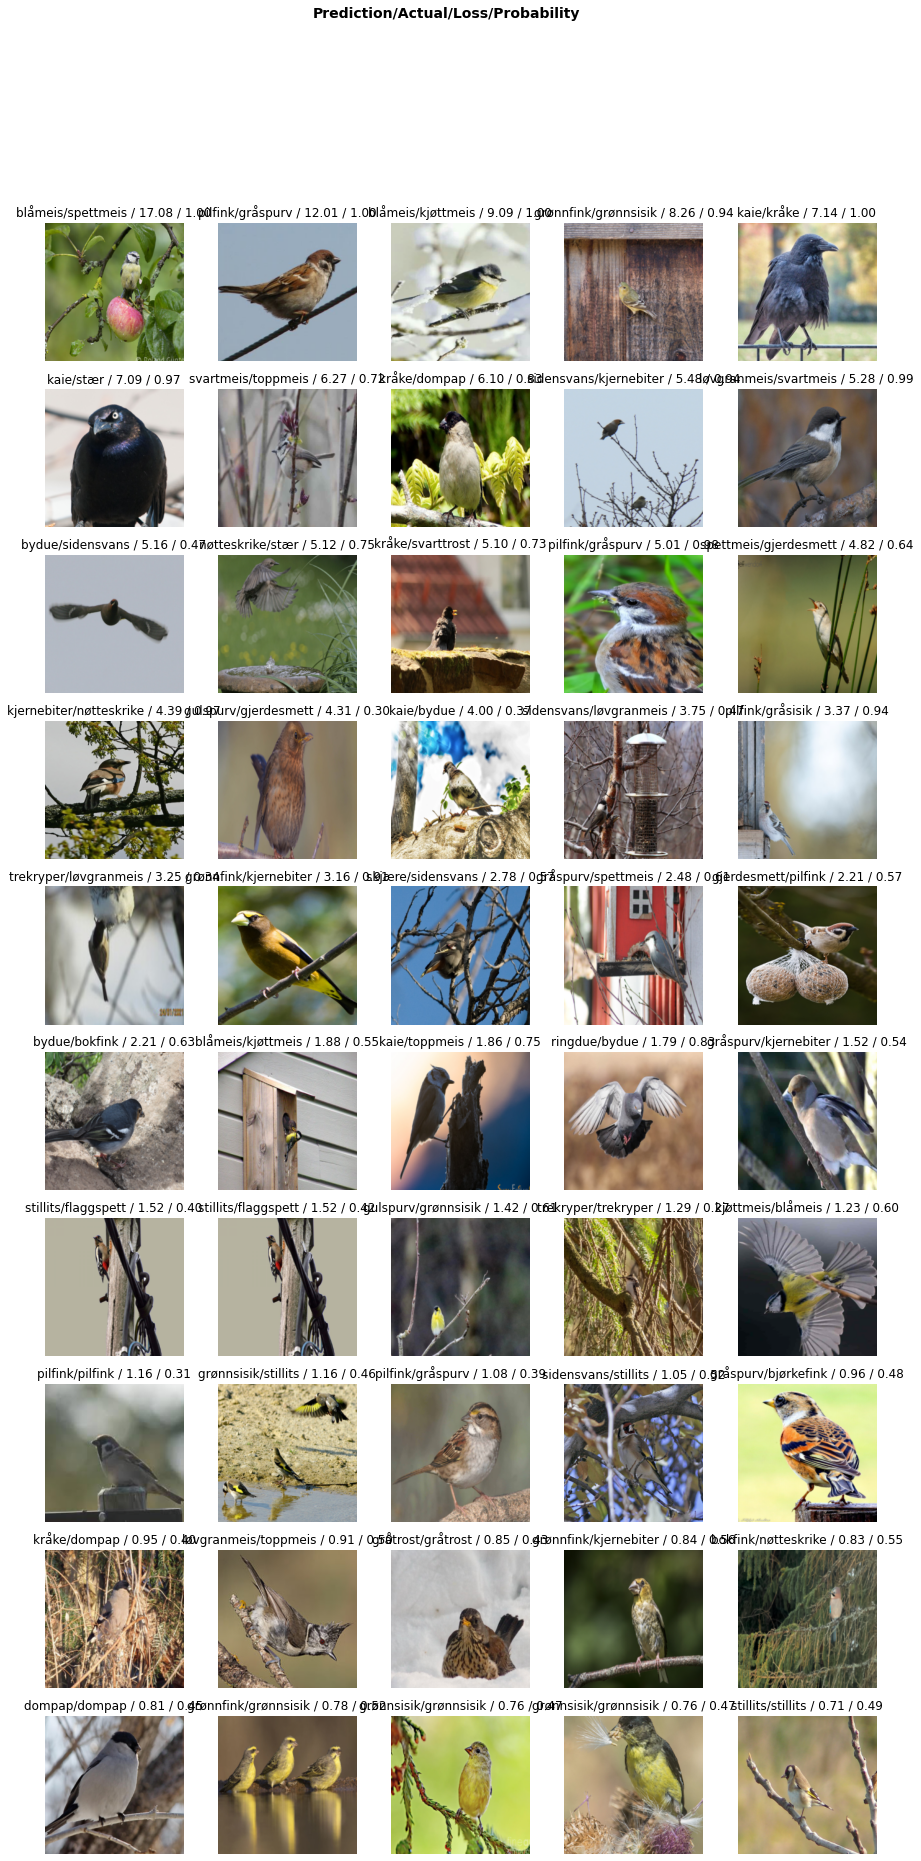

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(50, nrows=10)

## Some more data augmentation

Hmm, given our relatively small amount of data, stronger augmentation won't add much value? I was hoping data augmentation _added_ some augmented data (to get more of it), but is it just a random perturbation of a single image at training time? TODO: figure this out.

In [ ]:
# Add data augmentation
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=1.5)
)
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

## Squeezenet

Squeezenet is a small (in memory) model, which has poorer performance than ResNet and DenseNet. Not to be explored further.

In [ ]:
dls = birds_first.dataloaders(path, bs=64)

In [ ]:
## Deeper arcitechture
learn = cnn_learner(dls, squeezenet1_0, metrics=error_rate)
learn.fine_tune(5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(20, nrows=4)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner